<font face="Times New Roman" size=5>
<div dir=rtl align="center">
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Electrical Engineering
</font>
<br>
<font color="#008080" size=6>
Signals and Systems
</font>
<hr/>
<font color="#800080" size=5>
Assignment 2
<br>
</font>
<font size=5>
Instructor: Dr. Mojahedian

Student : Mohammad Amin QareAghaji Asl - 402170505
<br>
</font>
<font size=4>
Spr 2025
<br>
</font>
<font face="Times New Roman" size=4>

</font>
<hr>
<font color='red'  size=4>
Note: It is highly recommended to run your notebook on Google Colab or Kaggle
<br>
</font>
<font face="Times New Roman" size=4 align=center>
Feel free to ask your questions in Telegram:
 1.@RezaNayebH , 2.@kimkimi83 , 3.@amir_reza_tanevardi, 4.@Ali99os
</font>
<br>
<hr>
</div></font>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/BlackRanger4/Signals-and-Systems---CHW/blob/main/CHW_2.ipynb)


# 1. Bandpass Filtering in the FFT Domain

You should begin by recalling that discrete‐time white Gaussian noise is a sequence $w[n]$ whose samples are independent, zero‐mean Gaussian random variables with variance $\sigma^2$; its power spectral density is flat across all frequencies, and the noise power equals $\sigma^2$.  Likewise, the clean signal of interest is

$$
s[n] \;=\; \sin\!\bigl(2\pi f_1 n / f_s\bigr)\;+\;\sin\!\bigl(2\pi f_2 n / f_s\bigr),
$$

sampled at $f_s$ Hz for a duration $T$.

Your implementation task is to generate $s[n]$, corrupt it with white Gaussian noise of standard deviation $\sigma$, and then construct a rectangular bandpass filter in the FFT domain by zeroing all DFT coefficients outside a passband $[f_L,f_H]$.  Specifically, you will apply this FFT‐domain filter for exactly these four pairs of cutoff frequencies:

$$
\texttt{low\_cuts} = [0.98\,f_1,\;0.90\,f_1,\;0.50\,f_1,\;0.20\,f_1],
\quad
\texttt{high\_cuts} = [1.02\,f_2,\;1.20\,f_2,\;1.50\,f_2,\;2.00\,f_2].
$$

Plot, on a single time‐domain figure, the clean signal and some filtered outputs together, labeling each curve by its numeric $[f_L,f_H]$ pair in hertz.  For each $(f_L,f_H)$, compute the output SNR in dB as

$$
\mathrm{SNR} = 10\log_{10}\Bigl(\frac{\mathbb{E}[\,s[n]^2\,]}{\mathbb{E}[\,(\hat s[n]-s[n])^2\,]}\Bigr),
$$

where $\hat s[n]$ is the filtered signal.  Finally, organize your SNR values into a matrix whose rows correspond to the four low‐cut frequencies and whose columns correspond to the four high‐cut frequencies, and present this matrix alongside your overlaid plot.

---

**Question**)
 Consider additionally how changing the sampling rate $f_s$—while keeping the noise standard deviation $\sigma$ fixed—affects the measured SNR.  Explain whether increasing $f_s$ improves the output SNR, and provide a brief justification in terms of noise bandwidth, spectral resolution, and the relationship between total noise power and sampling frequency.

 ---

 **Answer**)
Increasing $f_s$ alone does not boost the SNR for fixed per‐sample noise σ cause the filter preserves the same analog band of white noise (and the same sinusoidal components), so both passband noise power and passband signal power remain constant.




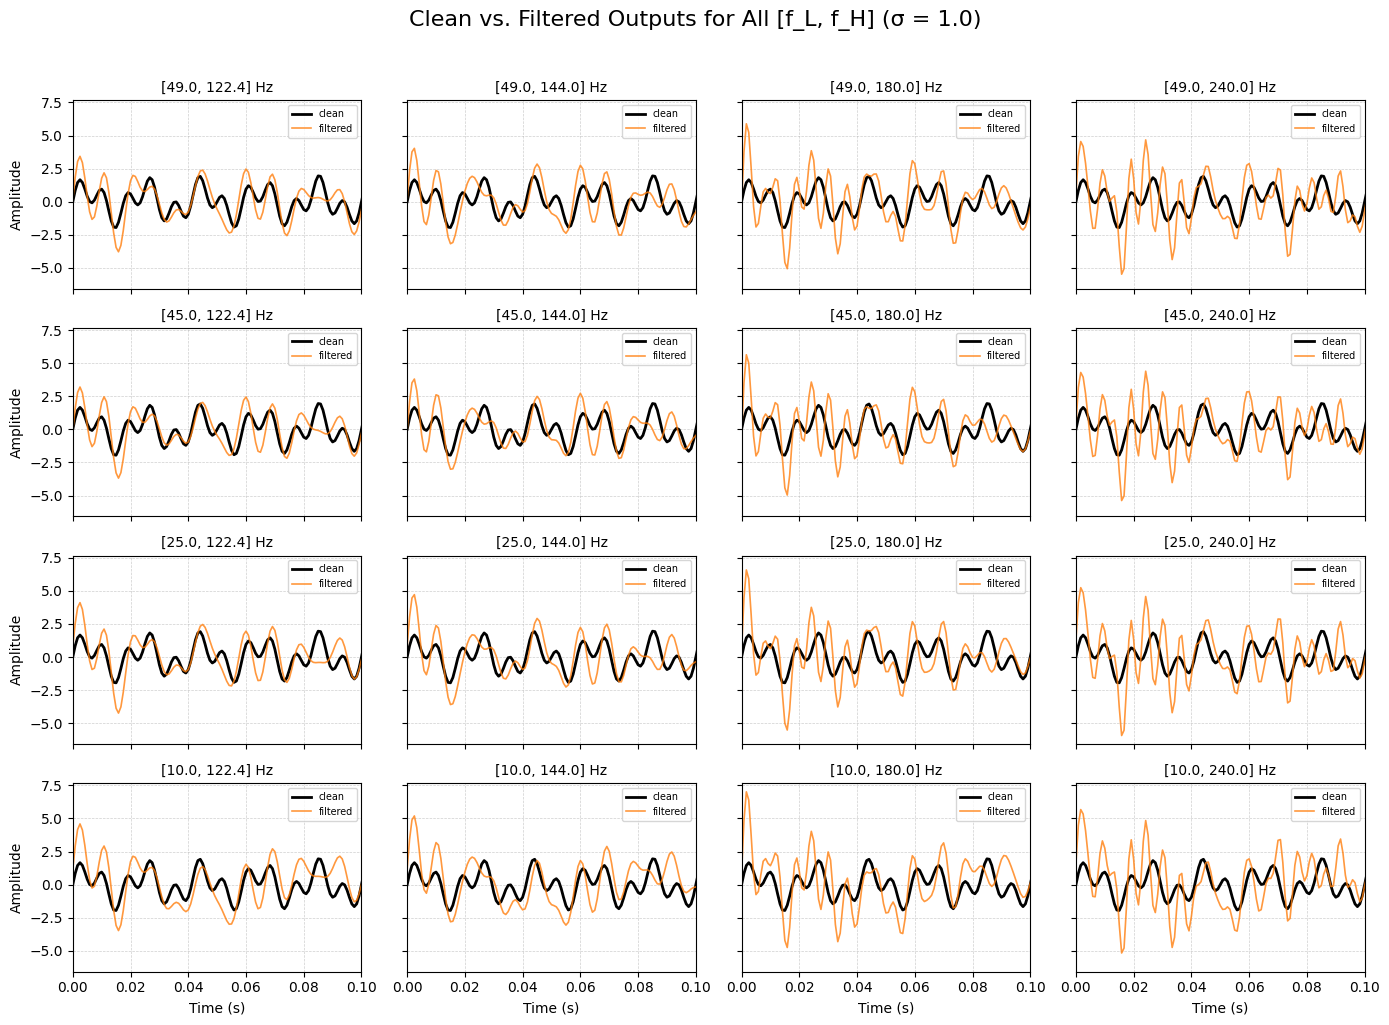

Output SNR (dB) for each [f_L, f_H] pair:



122.4      144.0      180.0      240.0
49.0  15.964020  14.535016  12.582759  11.339695
45.0  15.717250  14.356034  12.467732  11.253015
25.0  14.953728  13.785112  12.089668  10.964205
10.0  14.015432  13.050607  11.579255  10.565142

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(0)

def generate_signal(f1, f2, fs, duration):

    t = np.arange(0, duration, 1/fs)
    s = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)
    return t, s

def add_noise(sig, sigma):

    noise = np.random.normal(0, sigma, size=sig.shape)
    return sig + noise

def bandpass_fft(sig, fs, low, high):

    N = len(sig)
    X = np.fft.fft(sig)
    freqs = np.fft.fftfreq(N, d=1/fs)

    # Keep only bins where |freq| is between low and high
    mask = (np.abs(freqs) >= low) & (np.abs(freqs) <= high)
    X_filtered = X * mask

    # Inverse FFT and take the real part
    s_hat = np.fft.ifft(X_filtered)
    return np.real(s_hat)

def compute_snr(clean, test):

    power_signal = np.mean(clean**2)
    power_error = np.mean((test - clean)**2)

    if power_error == 0:
        return np.inf
    return 10 * np.log10(power_signal / power_error)


f1       = 50       # Hz, first sine
f2       = 120      # Hz, second sine
fs       = 10 * f2  # sampling rate (Hz)
duration = 1.0      # seconds
sigma    = 3.0      # noise standard deviation

low_cuts  = np.array([0.98 * f1, 0.90 * f1, 0.50 * f1, 0.20 * f1])

high_cuts = np.array([1.02 * f2, 1.20 * f2, 1.50 * f2, 2.00 * f2])

t = np.arange(0, duration, 1/fs)
clean = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

np.random.seed(0)
noisy = clean + np.random.normal(0, sigma, size=clean.shape)

filtered = {}
for low in low_cuts:
    for high in high_cuts:
        filtered[(low, high)] = bandpass_fft(noisy, fs, low, high)

fig, axes = plt.subplots(
    nrows=4, ncols=4,
    figsize=(14, 10),
    sharex=True, sharey=True
)

for i, low in enumerate(low_cuts):
    for j, high in enumerate(high_cuts):
        ax = axes[i, j]

        ax.plot(t, clean,
                color='black',
                linewidth=2.0,
                label='clean')

        s_hat = filtered[(low, high)]
        ax.plot(t, s_hat,
                color='C1',
                linewidth=1.2,
                alpha=0.8,
                label='filtered')

        ax.set_xlim(0, 0.1)
        ax.set_title(f"[{low:.1f}, {high:.1f}] Hz", fontsize=10)

        if i == 3:
            ax.set_xlabel("Time (s)")
        if j == 0:
            ax.set_ylabel("Amplitude")

        ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
        ax.legend(fontsize='x-small', loc='upper right')

plt.suptitle("Clean vs. Filtered Outputs for All [f_L, f_H] (σ = 1.0)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("Output SNR (dB) for each [f_L, f_H] pair:\n")
display(snr_df)

# 2. 2D Fourier Transform




The 2D Fourier Transform is an extension of the 1D Fourier Transform used to analyze two-dimensional signals, such as images. It transforms a spatial-domain signal (like an image) into the frequency domain.

**What It Does:**

It breaks down an image into its sinusoidal frequency components—telling us how much of each frequency is present and where.

**Mathematical Definition:**

For a continuous 2D function
$f(x,y)$, the 2D Fourier Transform is:

$$
F(u,v) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x, y) \, e^{-j 2 \pi (u x + v y)} \, dx \, dy
$$

$f(x,y)$ : the original image or spatial-domain signal

$F(u,v)$ : the frequency-domain representation

$u,v$ : frequency coordinates

In digital image processing, we usually use the **Discrete Fourier Transform** (DFT), computed using the **Fast Fourier Transform** (FFT) algorithm for efficiency.

**Why It's Useful:**

- It helps analyze the frequency content of images.

- It's widely used in image filtering, compression, and reconstruction.

- High-frequency components correspond to edges and fine details.

- Low-frequency components represent smooth areas and background.

**Inverse 2D Fourier Transform:**

To return to the original image from its frequency domain, we use the inverse transform:

$$
f(x,y) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} F(u,,v) \, e^{j 2 \pi (u x + v y)} \, du \, dv
$$

-------------------------------------------------------
##2.1)
Create three separate 256×256 grayscale images, each containing one of the following shapes centered on a black background:

**a square, a triangle, and a circle**

For each image:

- Apply a vertical shift and a horizontal shift to simulate motion in both directions.

- Compute the 2D Fourier Transform (FFT2) of the original image, the vertically shifted image, and the horizontally shifted image.

- Visualize the magnitude spectrum of each FFT.

- Compute and display the difference in magnitude between the original and each shifted image in the frequency domain.

**Analyze how motion (horizontal vs vertical) affects the frequency domain and whether the direction of movement can be inferred from changes in the FFT.**

------

Answer :

Magnitude invariance:  
Shifting an image by \((\Delta x,\Delta y)\) does not change \(\lvert F(u,v)\rvert\). Hence the “frequency difference” images are nearly black in both the horizontal‐shift and vertical‐shift cases.

Phase signature:  
The only way to distinguish a left/right shift from an up/down shift is to examine the FFT’s phase, because a horizontal shift shows up as a phase gradient in the `u` (horizontal-frequency) dimension, while a vertical shift appears as a phase gradient in the `v` (vertical-frequency) dimension.

-------

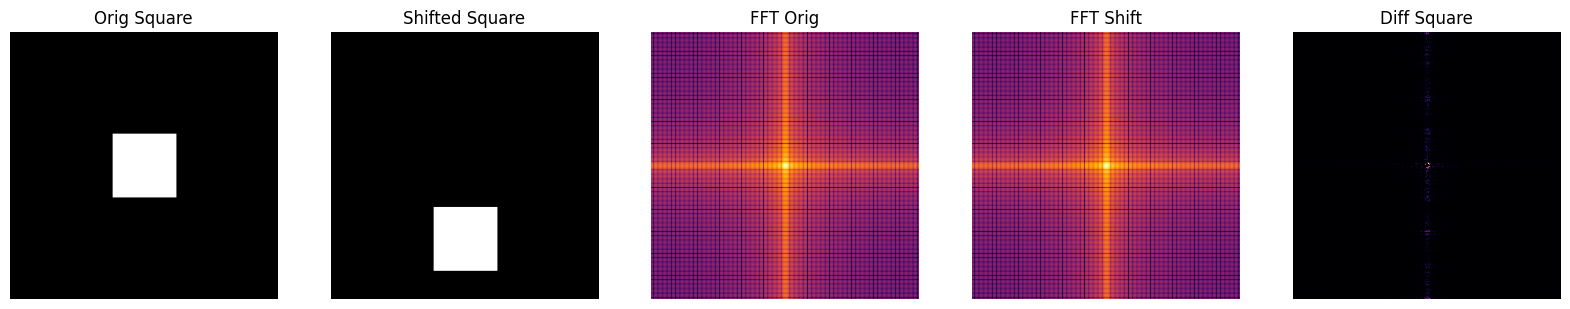

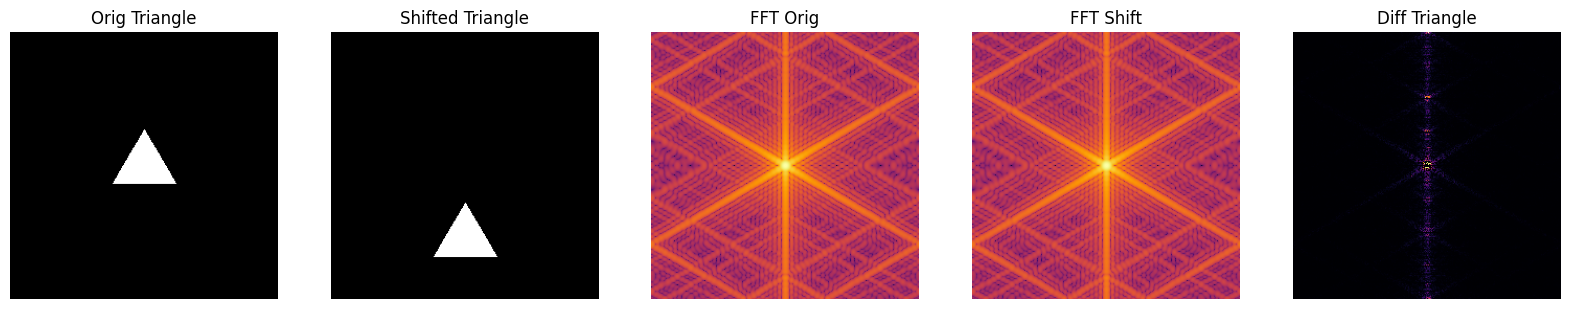

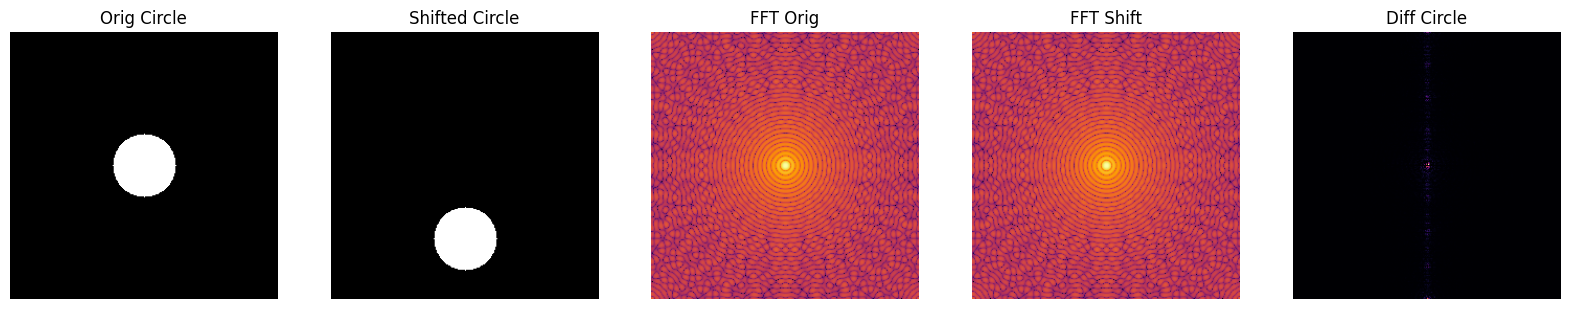

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img_size = 256

square = np.zeros((img_size, img_size), dtype=np.uint8)
cv2.rectangle(square, (98, 98), (158, 158), 255, -1)
square_shift = np.roll(square, 70, axis=0)

tri = np.zeros((img_size, img_size), dtype=np.uint8)
h = int(60 * np.sqrt(3) / 2)
pts = np.array([[128, 128 - 2*h//3], [128 - 30, 128 + h//3], [128 + 30, 128 + h//3]], np.int32)
cv2.fillConvexPoly(tri, pts, 255)
tri_shift = np.roll(tri, 70, axis=0)

circ = np.zeros((img_size, img_size), dtype=np.uint8)
cv2.circle(circ, (128, 128), 30, 255, -1)
circ_shift = np.roll(circ, 70, axis=0)

fft_square = np.abs(np.fft.fftshift(np.fft.fft2(square)))
fft_square_shift = np.abs(np.fft.fftshift(np.fft.fft2(square_shift)))
fft_tri = np.abs(np.fft.fftshift(np.fft.fft2(tri)))
fft_tri_shift = np.abs(np.fft.fftshift(np.fft.fft2(tri_shift)))
fft_circ = np.abs(np.fft.fftshift(np.fft.fft2(circ)))
fft_circ_shift = np.abs(np.fft.fftshift(np.fft.fft2(circ_shift)))

diff_square = np.abs(fft_square - fft_square_shift)
diff_square = diff_square / diff_square.max()
diff_tri = np.abs(fft_tri - fft_tri_shift)
diff_tri = diff_tri / diff_tri.max()
diff_circ = np.abs(fft_circ - fft_circ_shift)
diff_circ = diff_circ / diff_circ.max()

plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 1)
plt.imshow(square, cmap='gray')
plt.title('Orig Square')
plt.axis('off')
plt.subplot(1, 5, 2)
plt.imshow(square_shift, cmap='gray')
plt.title('Shifted Square')
plt.axis('off')
plt.subplot(1, 5, 3)
plt.imshow(np.log1p(fft_square), cmap='inferno')
plt.title('FFT Orig')
plt.axis('off')
plt.subplot(1, 5, 4)
plt.imshow(np.log1p(fft_square_shift), cmap='inferno')
plt.title('FFT Shift')
plt.axis('off')
plt.subplot(1, 5, 5)
plt.imshow(diff_square, cmap='inferno')
plt.title('Diff Square')
plt.axis('off')

plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 1)
plt.imshow(tri, cmap='gray')
plt.title('Orig Triangle')
plt.axis('off')
plt.subplot(1, 5, 2)
plt.imshow(tri_shift, cmap='gray')
plt.title('Shifted Triangle')
plt.axis('off')
plt.subplot(1, 5, 3)
plt.imshow(np.log1p(fft_tri), cmap='inferno')
plt.title('FFT Orig')
plt.axis('off')
plt.subplot(1, 5, 4)
plt.imshow(np.log1p(fft_tri_shift), cmap='inferno')
plt.title('FFT Shift')
plt.axis('off')
plt.subplot(1, 5, 5)
plt.imshow(diff_tri, cmap='inferno')
plt.title('Diff Triangle')
plt.axis('off')

plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 1)
plt.imshow(circ, cmap='gray')
plt.title('Orig Circle')
plt.axis('off')
plt.subplot(1, 5, 2)
plt.imshow(circ_shift, cmap='gray')
plt.title('Shifted Circle')
plt.axis('off')
plt.subplot(1, 5, 3)
plt.imshow(np.log1p(fft_circ), cmap='inferno')
plt.title('FFT Orig')
plt.axis('off')
plt.subplot(1, 5, 4)
plt.imshow(np.log1p(fft_circ_shift), cmap='inferno')
plt.title('FFT Shift')
plt.axis('off')
plt.subplot(1, 5, 5)
plt.imshow(diff_circ, cmap='inferno')
plt.title('Diff Circle')
plt.axis('off')

plt.show()

##2.2) Hybrid Image :
A hybrid image is an image that combines **low-frequency** content from one image with **high-frequency** content from another. The purpose of creating a hybrid image is to visually merge two different images in a way that reveals different characteristics at different scales. When viewed from a distance, the low-frequency (blurred) image becomes dominant, while up close, the high-frequency (detailed) content takes over. This effect is achieved by filtering the images in the frequency domain and then combining them.

- **Low-pass filter** : This filter allows low frequencies (smooth, blurred components) to pass through while attenuating the high frequencies (details and edges).

- **High-pass filter**: This filter allows high frequencies (edges, details) to pass through while attenuating the low frequencies (smooth, blurred components).

For better understanding, you can refer to the following link.

https://cs.brown.edu/courses/cs143/2011/results/proj1/edwallac/

---

Implement a hybrid image using the 2D Fourier Transform and Gaussian filters. The goal is to combine the low-frequency components of one image with the high-frequency components of another image, creating a hybrid image that shows different details depending on the viewing distance.

1. Image Preparation:

You will work with two images: one for the low-frequency part and one for the high-frequency part.

These images will be processed in the frequency domain using the 2D Fourier Transform.

2. Frequency Filtering:

For the low-frequency part: Apply a low-pass Gaussian filter to the first image (img1). The filter's sigma value determines the cutoff of the low frequencies.

For the high-frequency part: Apply a high-pass Gaussian filter to the second image (img2). The high-pass filter is obtained by subtracting the low-pass filter from 1.

3. Creating the Hybrid Image:

Compute the 2D FFT of both images.

Apply the appropriate filters to the frequency domain versions of the images.

Use the inverse 2D FFT to convert the filtered frequency domain images back to the spatial domain.

Combine the low-frequency and high-frequency components to create the hybrid image.

4. Visualization:

For different values of sigma_low and sigma_high, display the following for each case:

The low-frequency component.

The high-frequency component.

The hybrid image (combination of both).

5. Exploration:

Vary the values of sigma_low and sigma_high to see how the hybrid image changes.

Observe how the hybrid image behaves differently depending on the viewing distance: at a distance, the low frequencies dominate, and up close, the high frequencies are more visible.


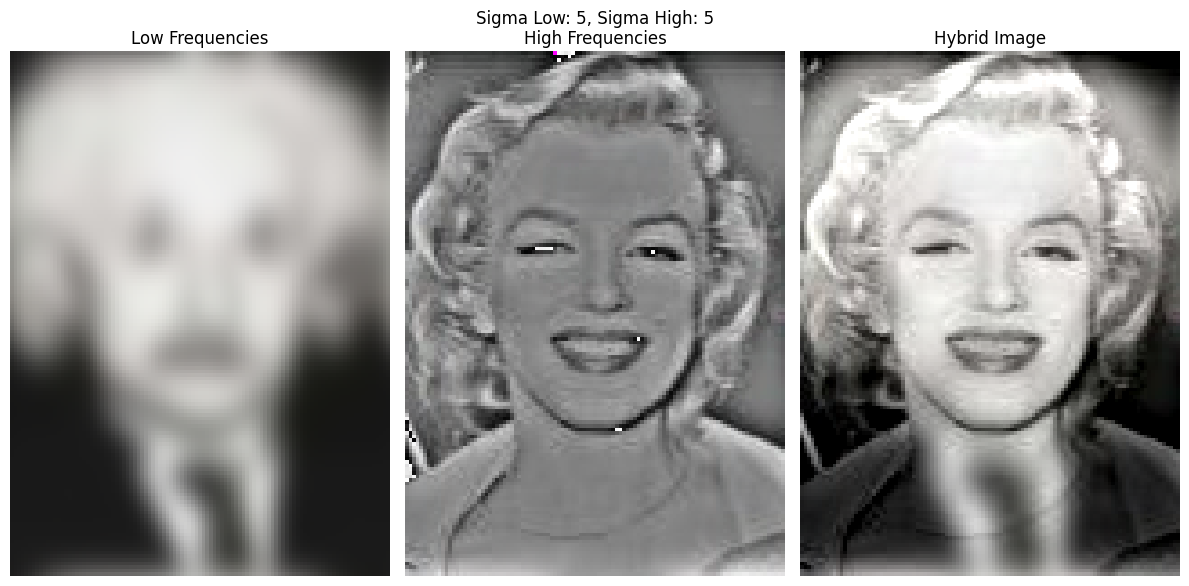

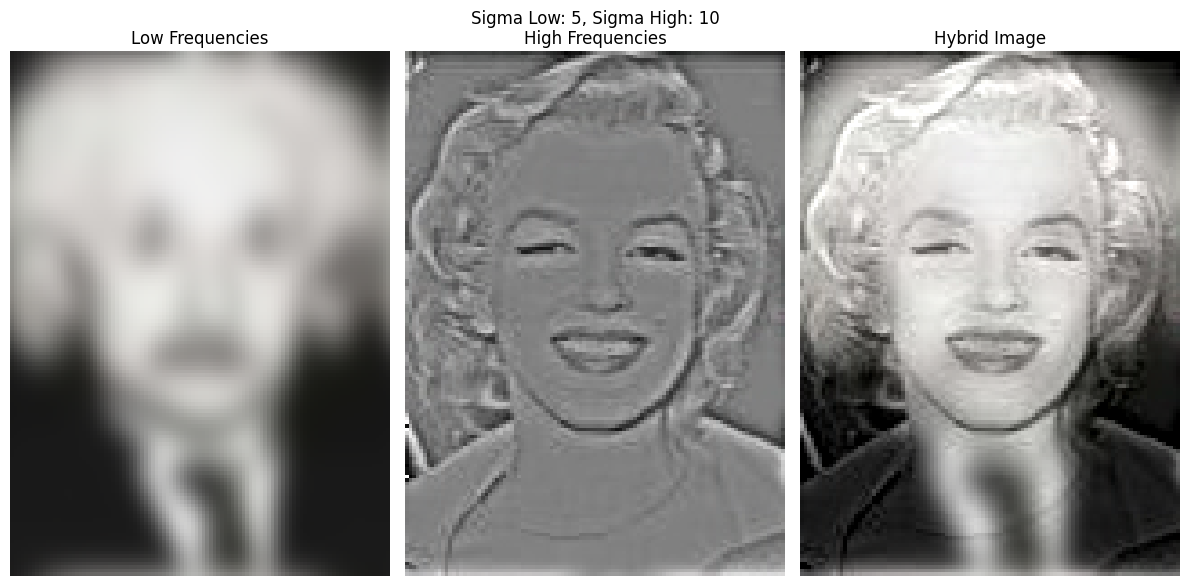

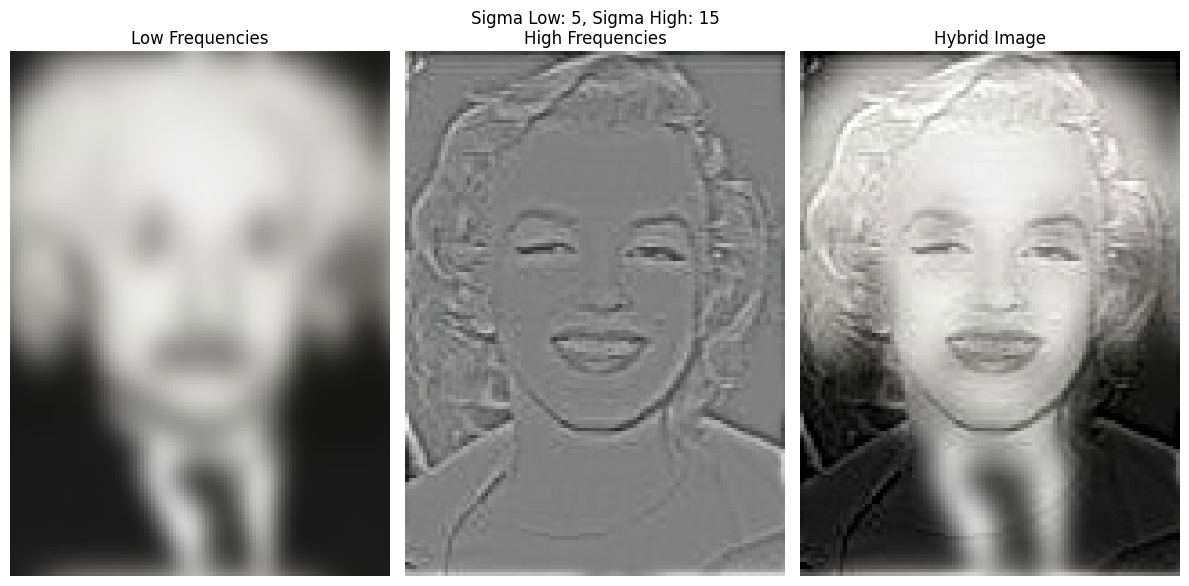

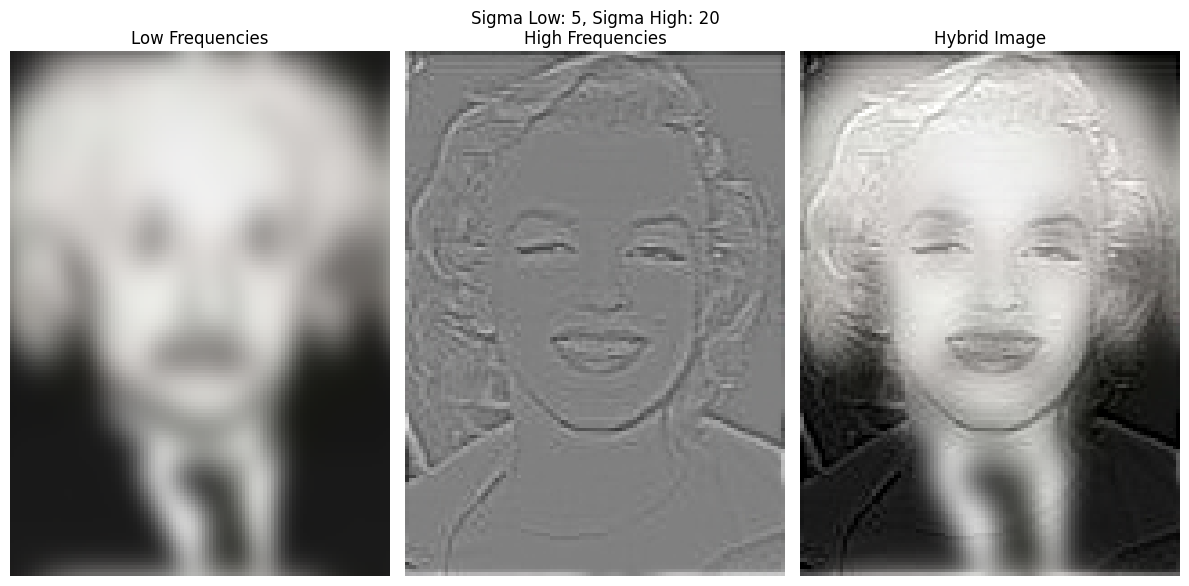

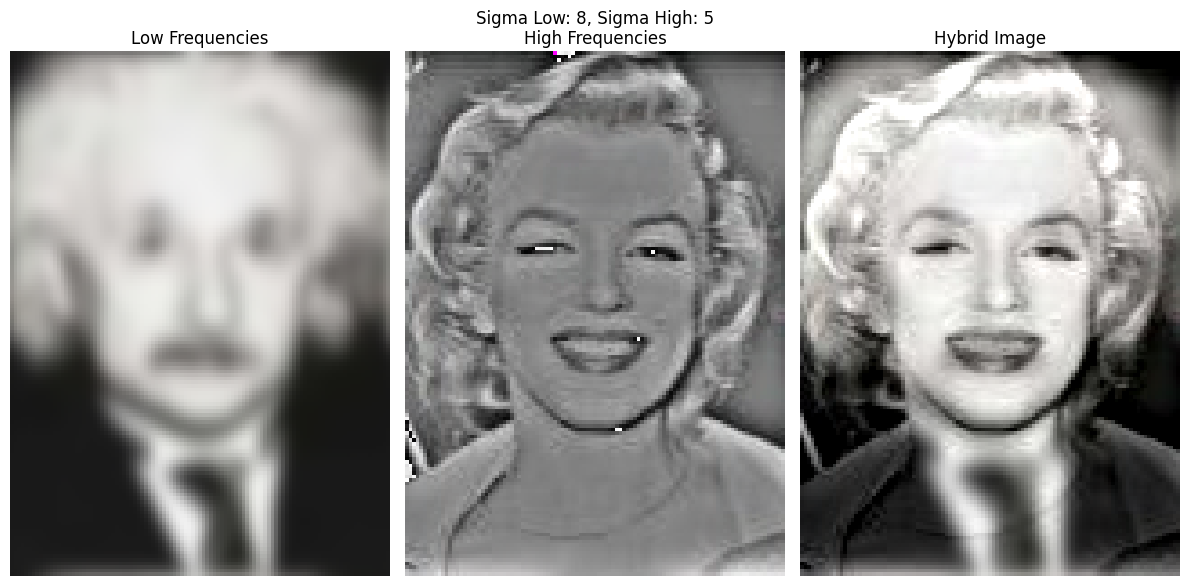

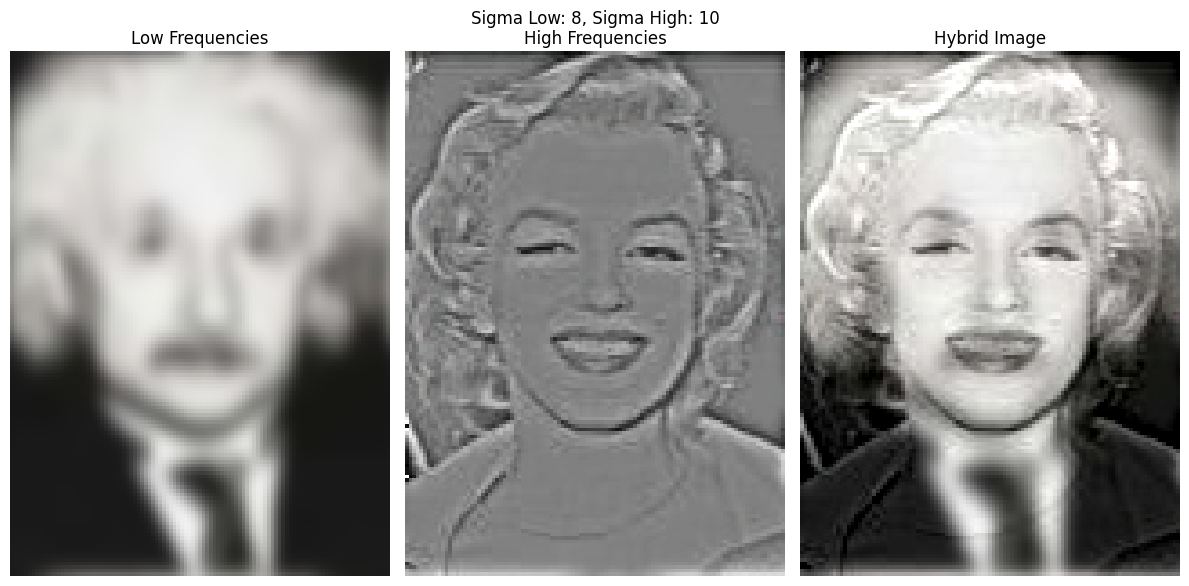

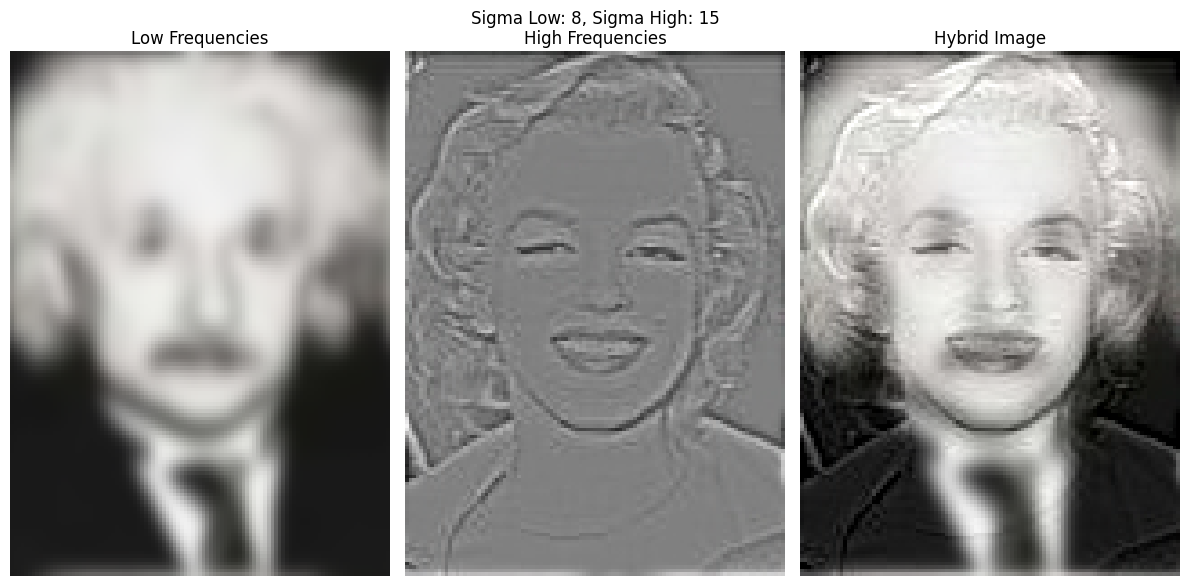

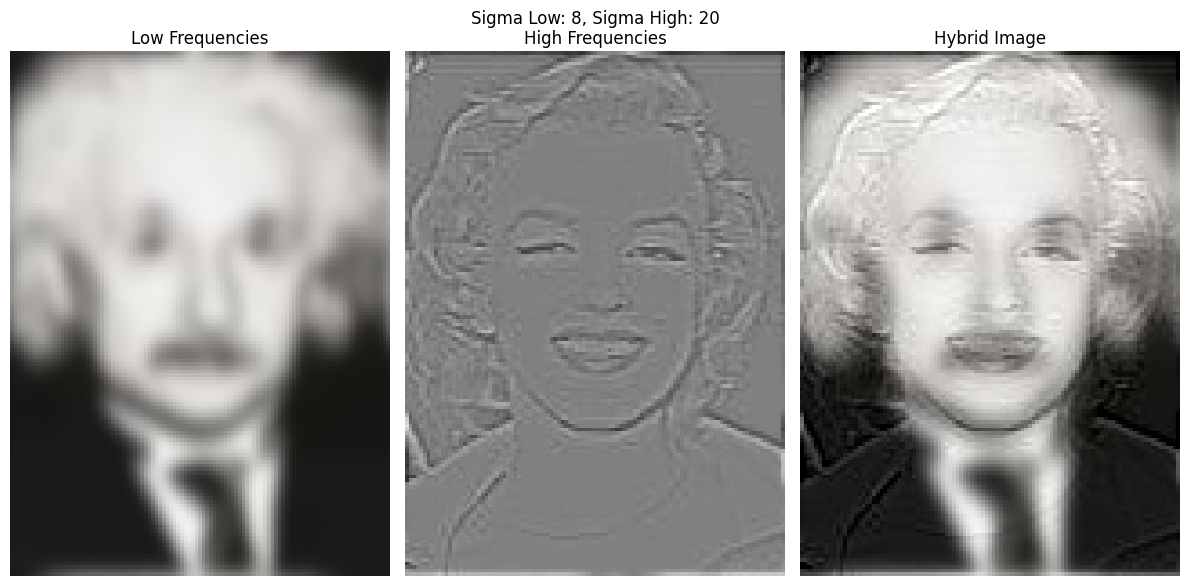

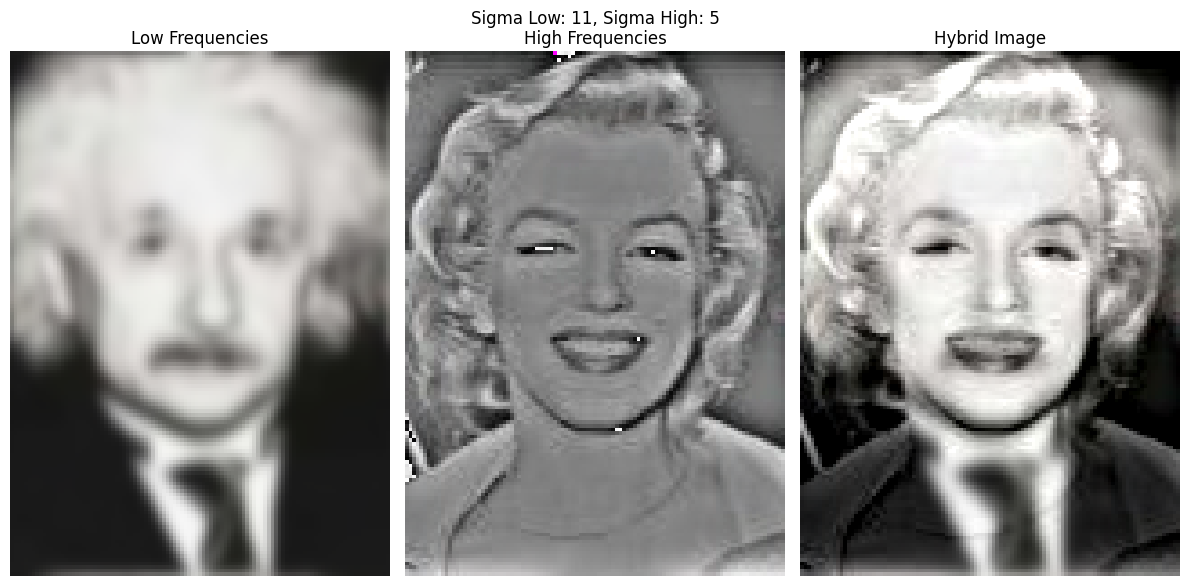

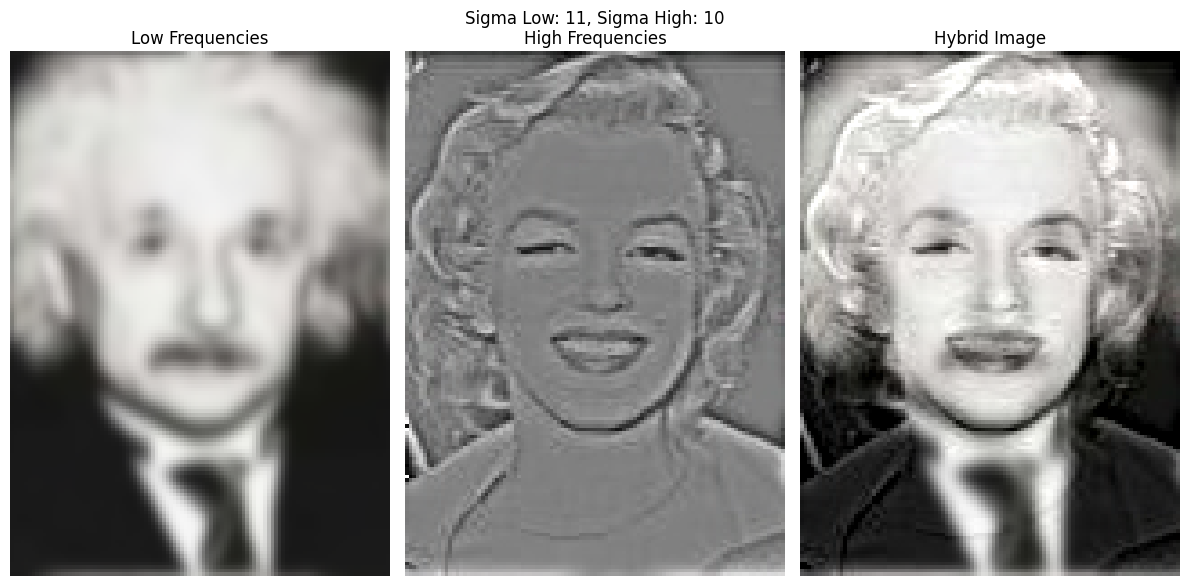

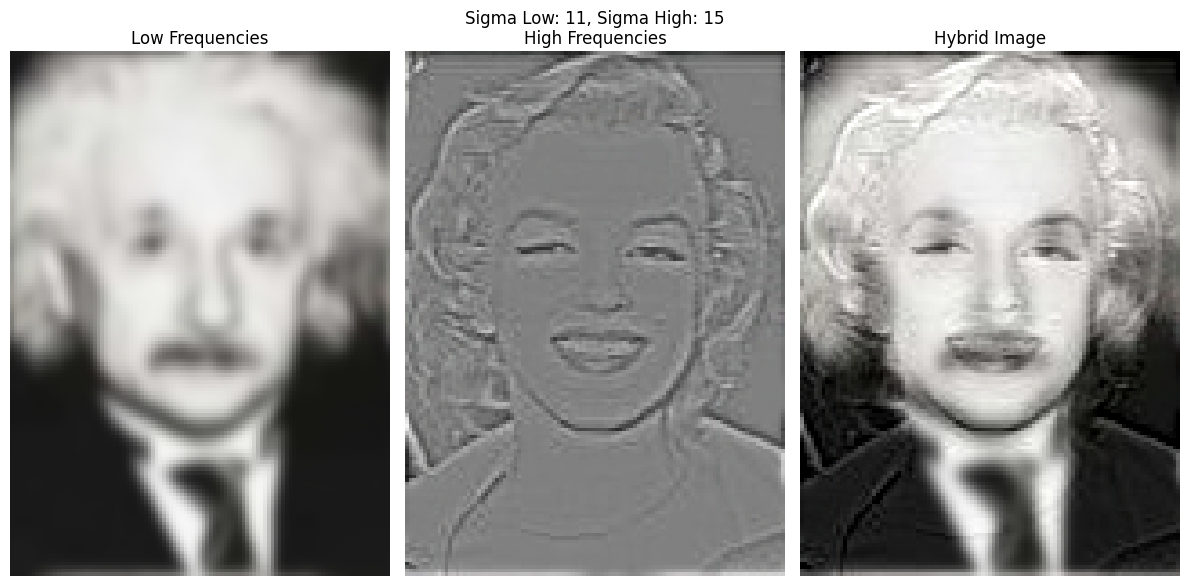

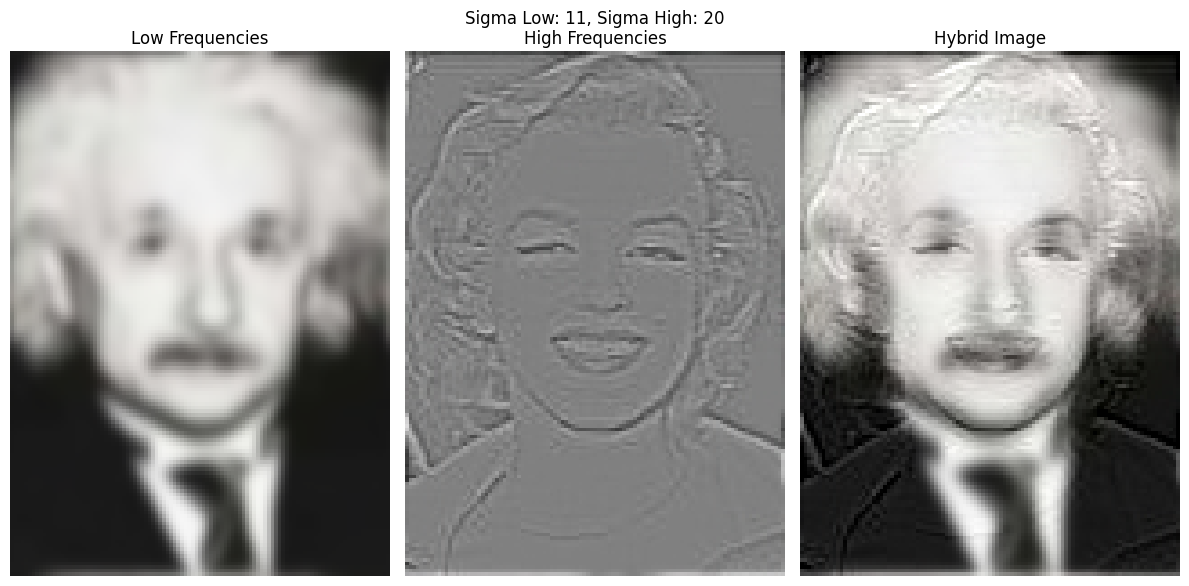

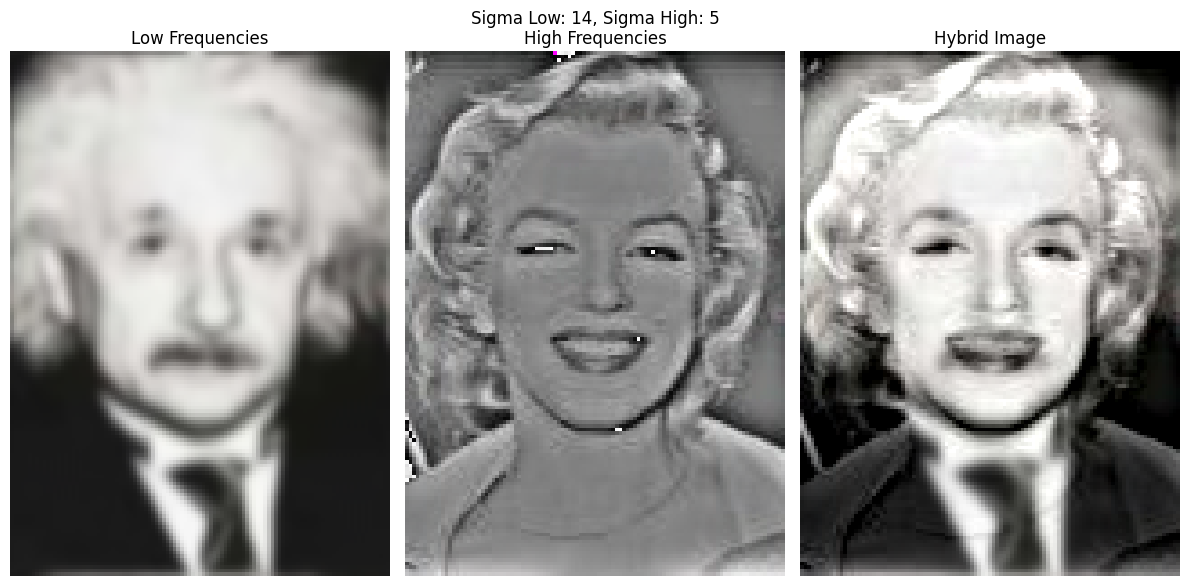

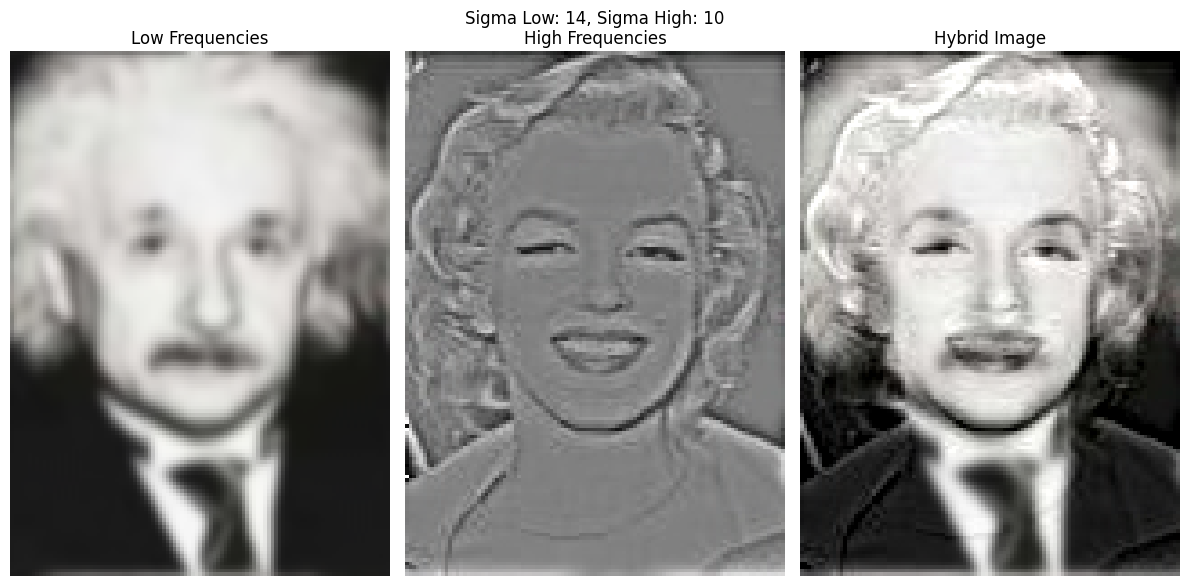

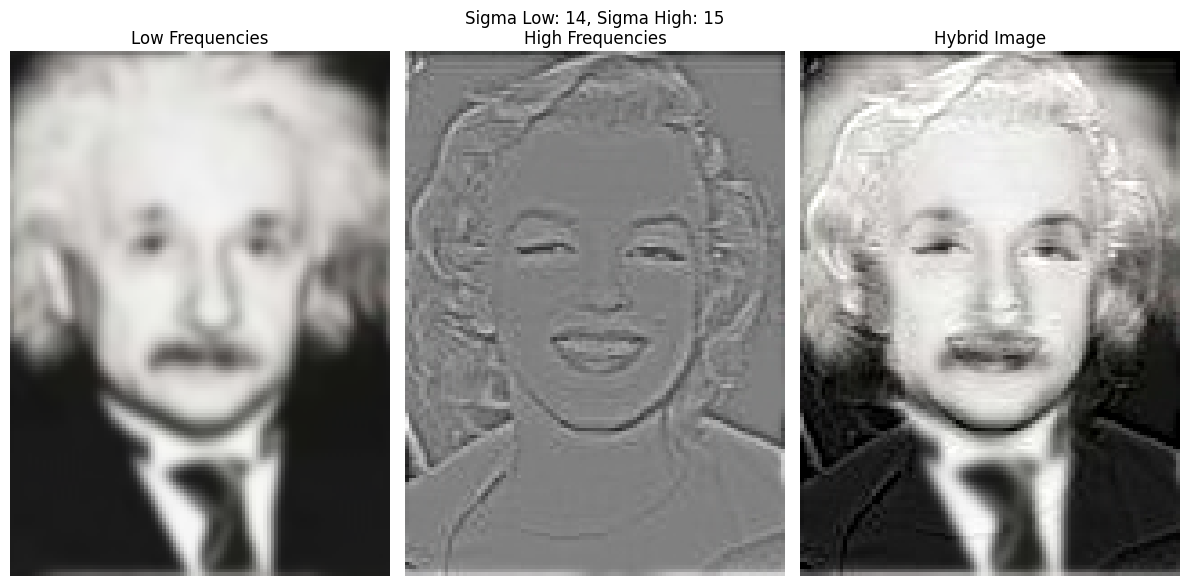

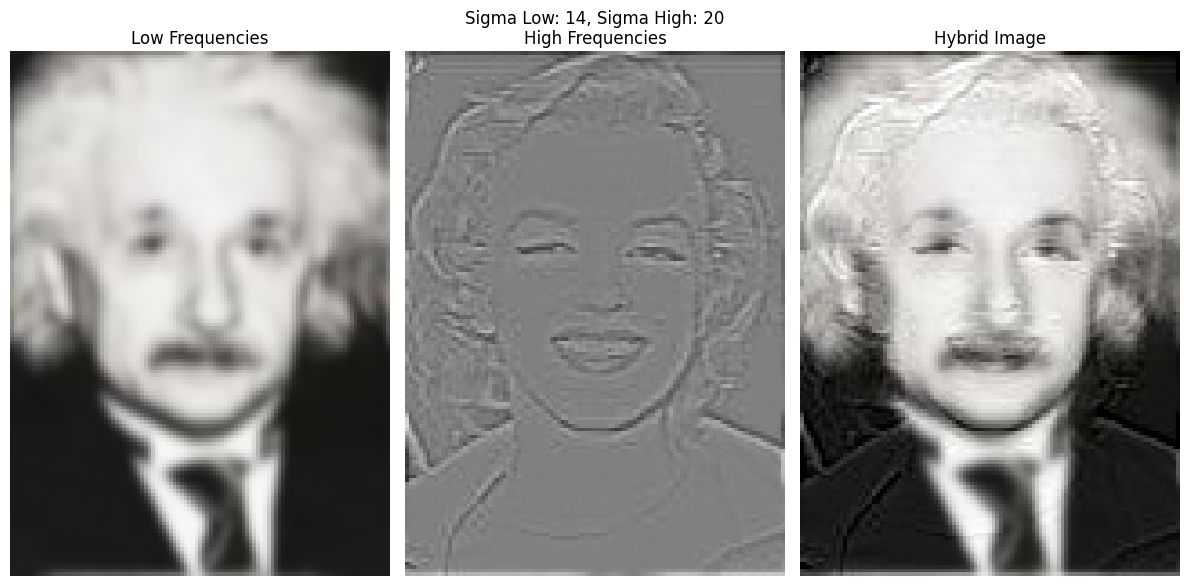

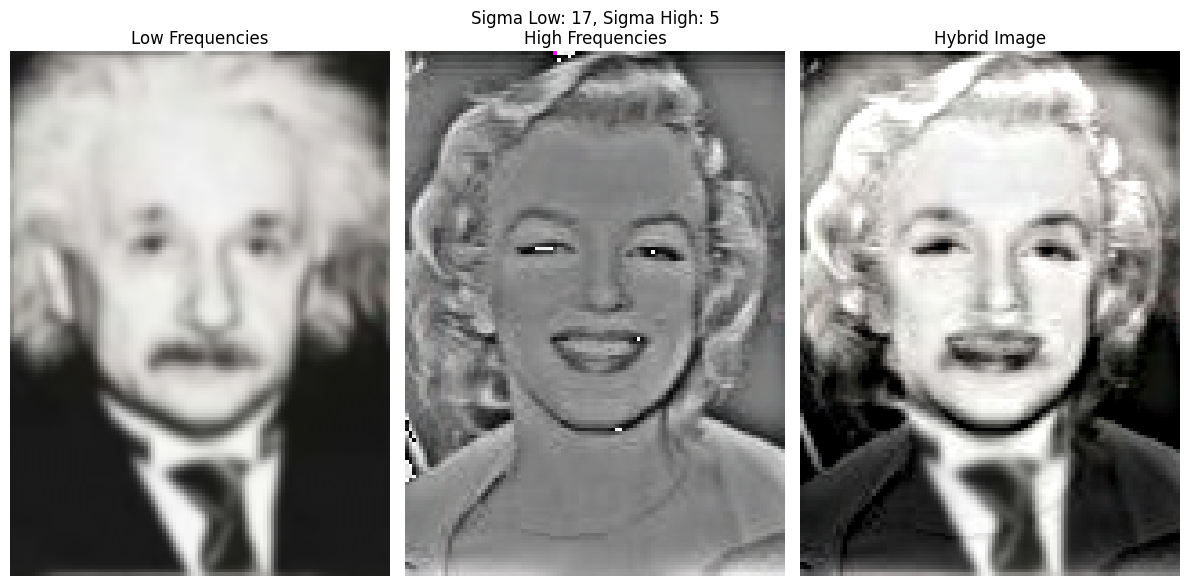

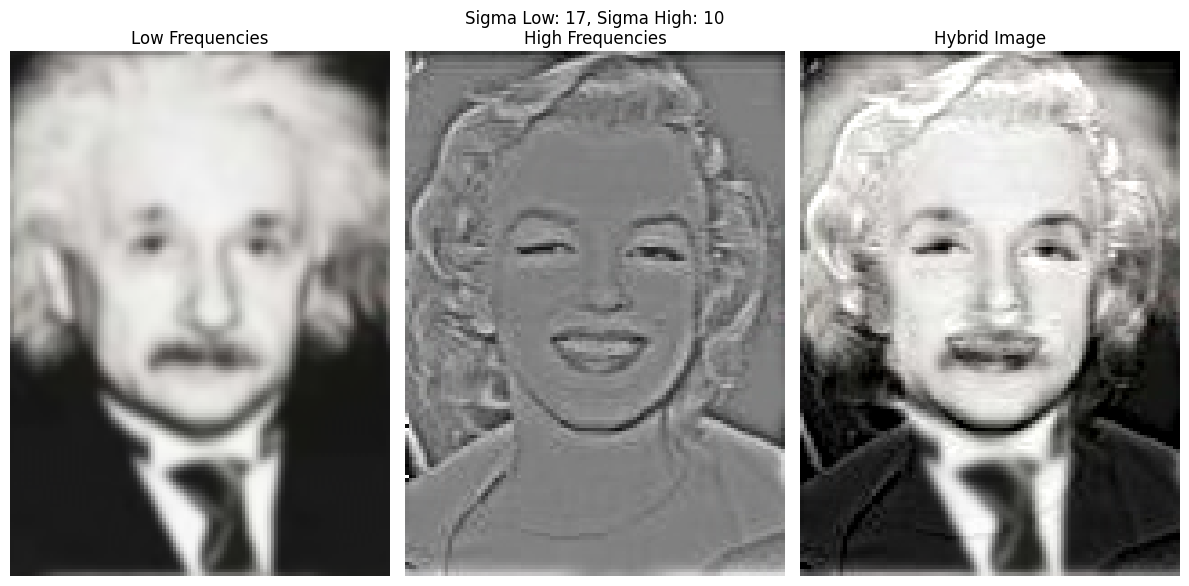

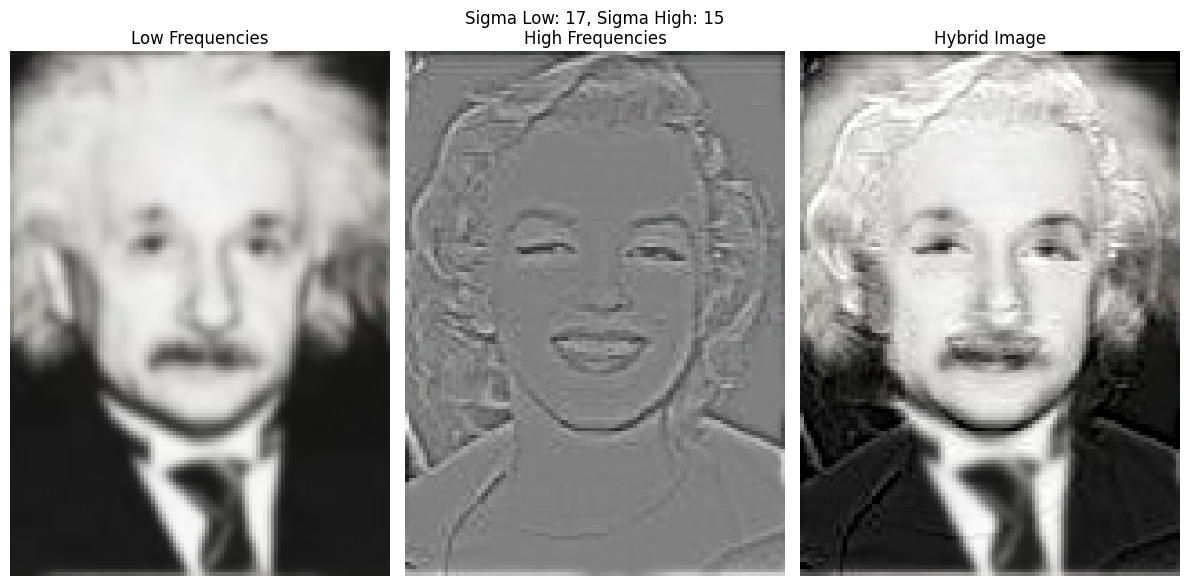

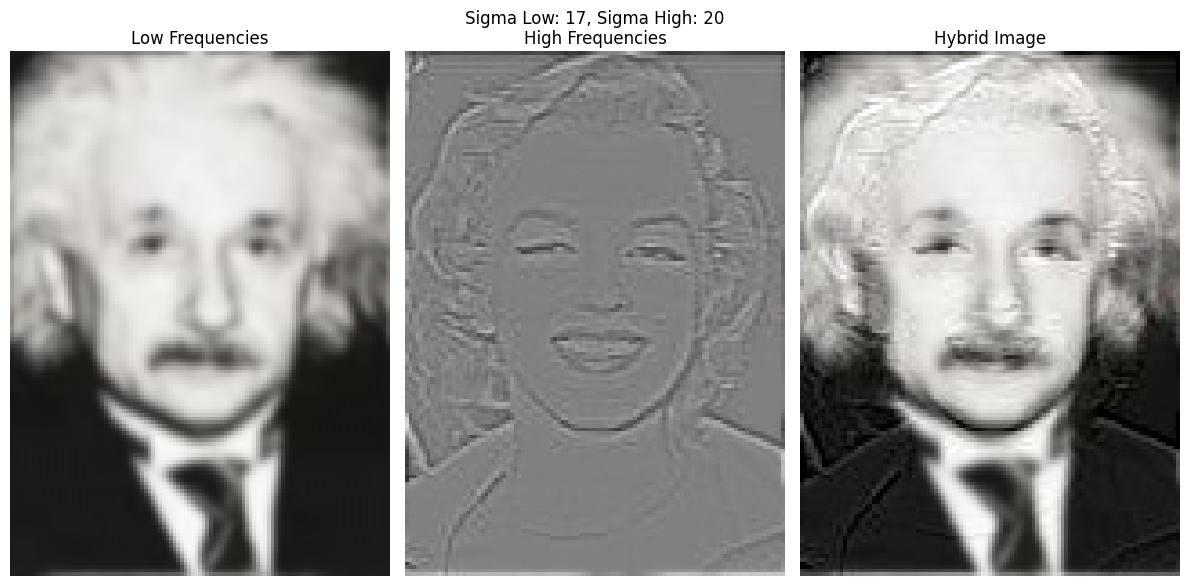

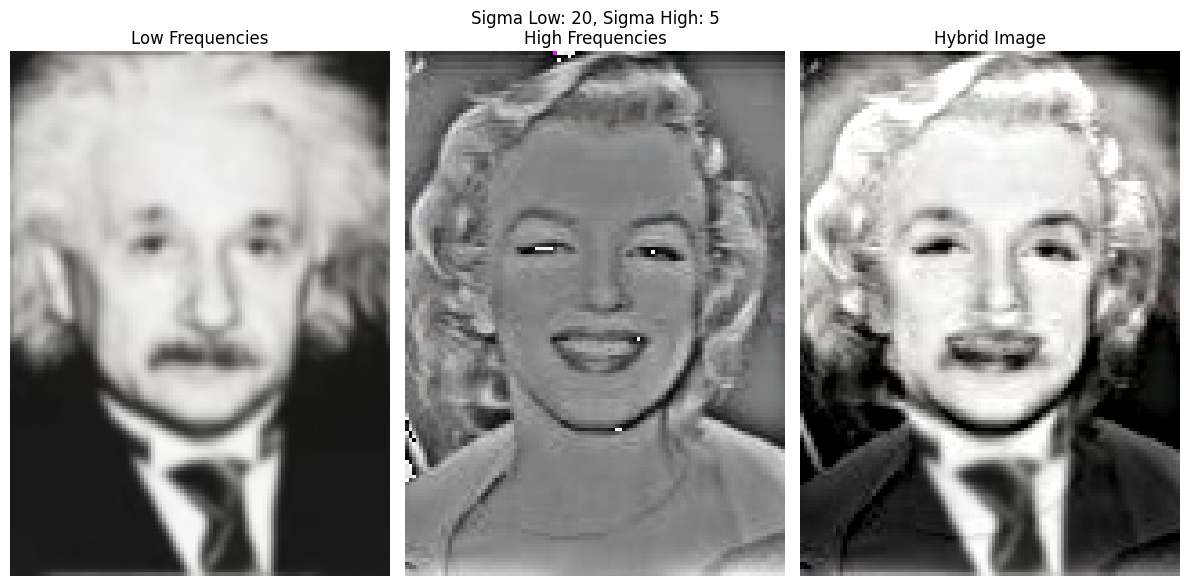

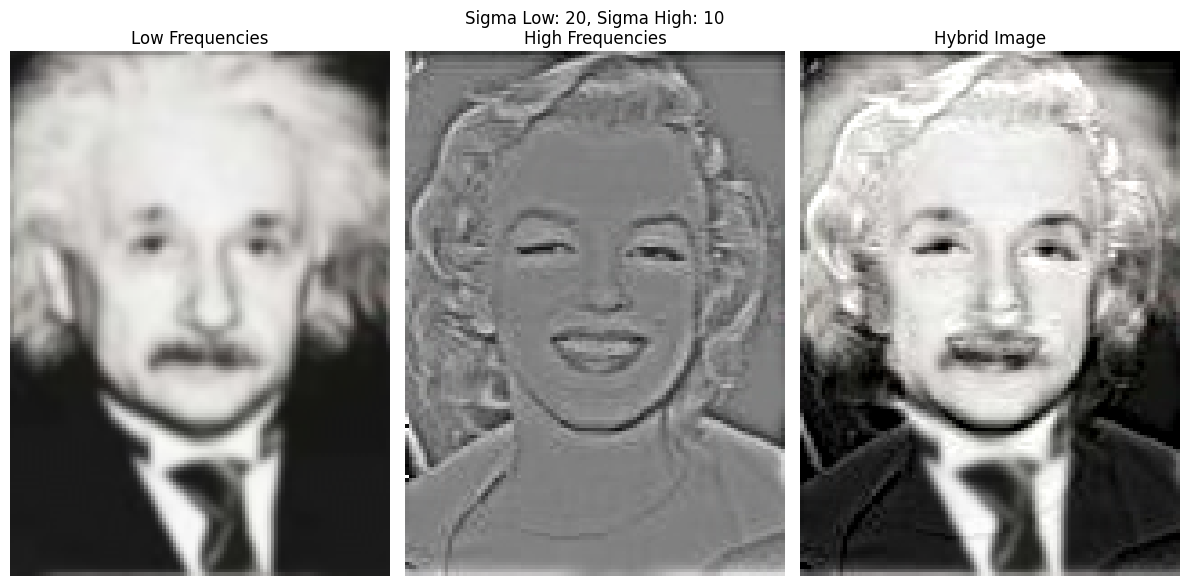

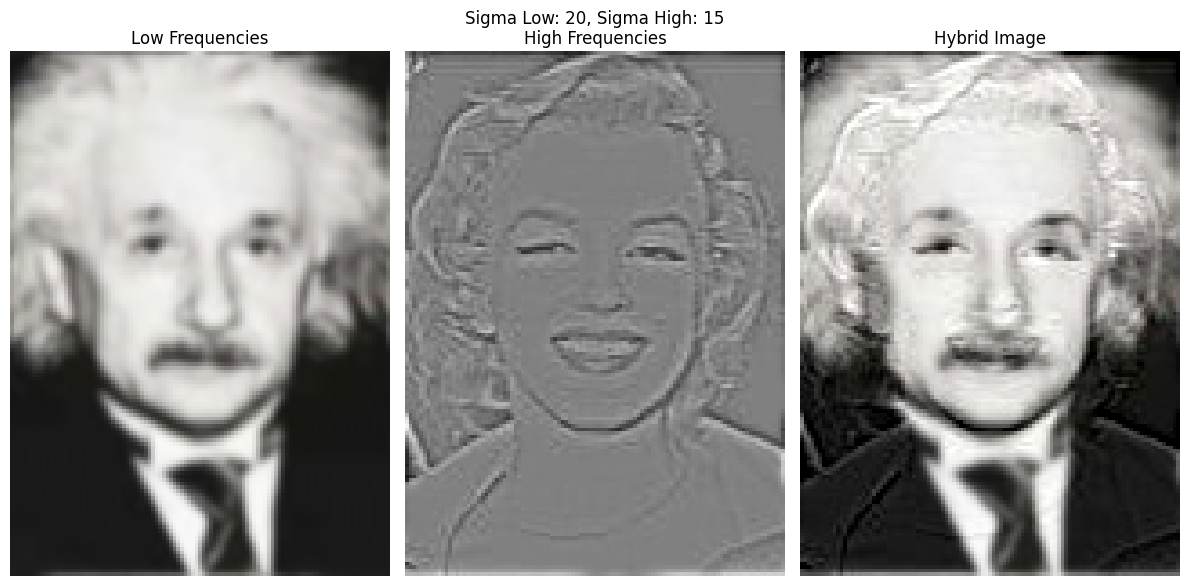

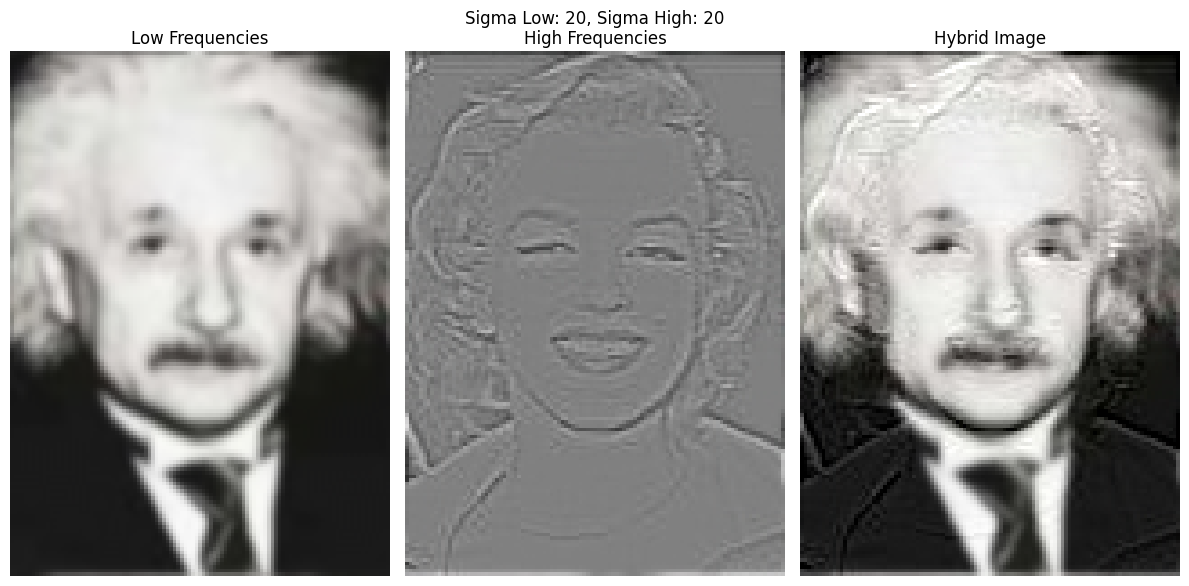

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def fft2d(img):
    return np.fft.fftshift(np.fft.fft2(img))

def ifft2d(freq):
    return np.fft.ifft2(np.fft.ifftshift(freq))

def create_gaussian_filter(shape, sigma, highpass=False):
    rows, cols = shape
    crow, ccol = rows//2, cols//2
    u = np.arange(rows) - crow
    v = np.arange(cols) - ccol
    U, V = np.meshgrid(v, u)
    gauss = np.exp(-((U**2 + V**2)/(2*(sigma**2))))
    if highpass:
        return 1 - gauss
    return gauss

def create_hybrid_fft(img1, img2, sigma_low, sigma_high):
    img1 = img1.astype(np.float32)/255.0
    img2 = img2.astype(np.float32)/255.0
    low_frequencies = np.zeros_like(img1)
    high_frequencies = np.zeros_like(img2)
    for c in range(3):
        f1 = fft2d(img1[:,:,c])
        f2 = fft2d(img2[:,:,c])
        lp = create_gaussian_filter(img1[:,:,c].shape, sigma_low, highpass=False)
        hp = create_gaussian_filter(img2[:,:,c].shape, sigma_high, highpass=True)
        lf = f1 * lp
        hf = f2 * hp
        low = np.real(ifft2d(lf))
        high = np.real(ifft2d(hf))
        low_frequencies[:,:,c] = low
        high_frequencies[:,:,c] = high
    hybrid = low_frequencies + high_frequencies
    hybrid = np.clip(hybrid, 0, 1)
    return (low_frequencies*255).astype(np.uint8), (high_frequencies*255).astype(np.uint8), (hybrid*255).astype(np.uint8)

def sweep_sigma_fft(img1_path, img2_path):
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))
    for sigma_low in range(5, 21, 3):
        for sigma_high in range(5, 21, 5):
            low_freq, high_freq, hybrid = create_hybrid_fft(img1, img2, sigma_low, sigma_high)
            plt.figure(figsize=(12, 6))
            plt.suptitle(f'Sigma Low: {sigma_low}, Sigma High: {sigma_high}')
            plt.subplot(1, 3, 1)
            plt.imshow(low_freq)
            plt.title('Low Frequencies')
            plt.axis('off')
            plt.subplot(1, 3, 2)
            plt.imshow(np.clip(high_freq+128, 0, 255).astype(np.uint8))
            plt.title('High Frequencies')
            plt.axis('off')
            plt.subplot(1, 3, 3)
            plt.imshow(hybrid)
            plt.title('Hybrid Image')
            plt.axis('off')
            plt.tight_layout()
            plt.show()

img1_path = '/content/mg19325971.600-2_734-1.jpg'
img2_path = '/content/mg19325971.600-2_734.jpg'
sweep_sigma_fft(img1_path, img2_path)

# 3. SIFT Feature Extraction and Matching


In this section of the assignment, you’ll work with the SIFT (Scale-Invariant Feature Transform) algorithm to find and match features between images. SIFT is a popular method for detecting interesting points in an image (like corners, edges, and blobs) and describing them in a way that stays consistent even if the image is rotated, scaled, or slightly changed.

You will do two main things:
1. **Extract Features and Descriptors:** Run SIFT on images to find keypoints and generate their descriptors. Keypoints mark important spots in the image, and descriptors describe the region around each keypoint.
2. **Match Features Between Images:** Once you have descriptors from two images, you’ll match them to find points that likely correspond to the same part of the scene.


## How SIFT Works


### 1. Scale-Space Construction and Octaves

To detect features at different scales, SIFT builds a **scale-space**.  
The scale-space of an image $ I(x,y) $ is defined as:

$$
L(x,y,\sigma) = G(x,y,\sigma) * I(x,y)
$$

where:
- $ * $ is convolution,
- $ G(x,y,\sigma) $ is a Gaussian function with standard deviation $ \sigma $:
  
$$
G(x,y,\sigma) = \frac{1}{2\pi\sigma^2} \exp\left( -\frac{x^2 + y^2}{2\sigma^2} \right)
$$

Instead of directly using the Gaussian blurred images, SIFT works with the **Difference of Gaussians (DoG)**, which approximates the Laplacian of Gaussian (LoG):

$$
D(x,y,\sigma) = L(x,y,k\sigma) - L(x,y,\sigma)
$$

where $ k $ is a constant scale multiplier.

The images are grouped into **octaves**.  
Each octave contains a set of blurred images at increasing scales, and after each octave, the image is **downsampled by a factor of 2** to start a new octave.  
This way, features are captured efficiently over a wide range of sizes.

Here is a visual demonstration:

<p align="center">
  <img src="https://docs.opencv.org/4.x/sift_dog.jpg" width="400"/>
</p>

<br>
<br>

### 2. Keypoint Detection (Finding Extrema)

SIFT detects keypoints by finding local extrema in the DoG images.  
Each pixel is compared to its 26 neighbors (8 in the current scale, 9 above, and 9 below).  
A pixel is selected as a keypoint if it is a maximum or minimum among all these neighbors.

<br>
<br>

### 3. Keypoint Localization (Refining the Keypoints)

Once a candidate keypoint is found, its exact position and scale are refined.  
A Taylor series expansion of the DoG function around the candidate point is used:

$$
D(\mathbf{x}) = D + \frac{\partial D}{\partial \mathbf{x}}^T \mathbf{x} + \frac{1}{2} \mathbf{x}^T \frac{\partial^2 D}{\partial \mathbf{x}^2} \mathbf{x}
$$

where $ \mathbf{x} = (x, y, \sigma) $ is the offset from the candidate point.

Keypoints with low contrast or those poorly localized along edges are discarded, using eigenvalues of the local Hessian matrix.

<br>
<br>

### 4. Orientation Assignment

Each keypoint is assigned one or more dominant orientations based on the image gradients in its neighborhood.  
The gradient magnitude and direction are computed as:

$$
m(x,y) = \sqrt{(L(x+1,y) - L(x-1,y))^2 + (L(x,y+1) - L(x,y-1))^2}
$$
$$
\theta(x,y) = \arctan\left( \frac{L(x,y+1) - L(x,y-1)}{L(x+1,y) - L(x-1,y)} \right)
$$

An orientation histogram (typically 36 bins over 360°) is created, and the highest peak (or multiple peaks) defines the keypoint orientation(s).

<br>
<br>

### 5. Descriptor Generation

Around each keypoint, SIFT computes a descriptor that is robust to lighting and viewpoint changes:
- The neighborhood is divided into a \( 4 \times 4 \) grid.
- In each grid cell, an 8-bin orientation histogram is created.
- This results in a 128-dimensional descriptor:

$$
4 \times 4 \times 8 = 128
$$

The descriptor is normalized to unit length to reduce the effects of illumination changes.

## Imports and Libraries

In [14]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

## Loading the images

First we load the images we want to work with.

In [15]:
img1 = cv2.imread('/content/img1.png')
img2 = cv2.imread('/content/img2.png')

# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

Now plot each image.

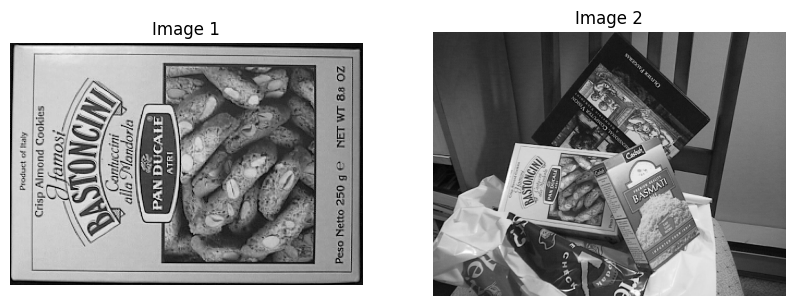

In [16]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray1, cmap='gray')
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray2, cmap='gray')
plt.title('Image 2')
plt.axis('off')
plt.show()

## Creating SIFT detector

We now create the SIFT detoctor using the `cv` library.

(np.float64(-0.5), np.float64(323.5), np.float64(222.5), np.float64(-0.5))

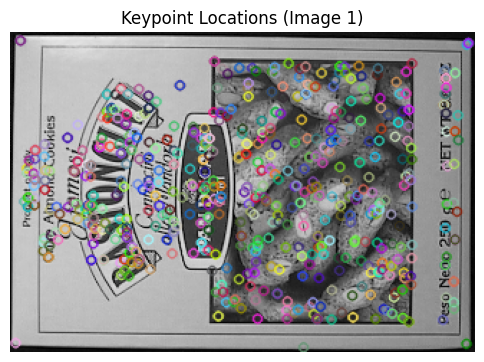

In [17]:
# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints with SIFT
keypoints1 = sift.detect(gray1, None)

# compute the descriptors with SIFT
keypoints1, descriptors1 = sift.compute(gray1, keypoints1)

# draw only keypoints locations (no size or orientation)
img1_kp = cv.drawKeypoints(img1, keypoints1, None, flags=cv.DRAW_MATCHES_FLAGS_DEFAULT)
plt.figure(figsize=(6, 6))
plt.imshow(cv.cvtColor(img1_kp, cv.COLOR_BGR2RGB))
plt.title('Keypoint Locations (Image 1)')
plt.axis('off')


Now repeat it for the second image.

(np.float64(-0.5), np.float64(511.5), np.float64(383.5), np.float64(-0.5))

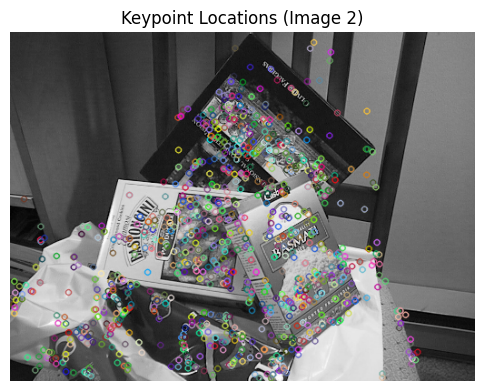

In [18]:
# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints with SIFT
keypoints2 = sift.detect(gray2, None)

# compute the descriptors with SIFT
keypoints2, descriptors2 = sift.compute(gray2, keypoints2)

# draw only keypoints locations (no size or orientation)
img2_kp = cv.drawKeypoints(img2, keypoints2, None, flags=cv.DRAW_MATCHES_FLAGS_DEFAULT)
plt.figure(figsize=(6, 6))
plt.imshow(cv.cvtColor(img2_kp, cv.COLOR_BGR2RGB))
plt.title('Keypoint Locations (Image 2)')
plt.axis('off')


## Matching the descriptors

Now complete these two functions that find and plot the matching points.

In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def find_nearest_keypoints(descriptors1, keypoints1, descriptors2, keypoints2):
    correspondences = []
    for i, d1 in enumerate(descriptors1):
        min_distance = float('inf')
        nearest_kp = None
        for j, d2 in enumerate(descriptors2):
            dist = np.linalg.norm(d1 - d2)
            if dist < min_distance:
                min_distance = dist
                nearest_kp = keypoints2[j]
        correspondences.append((keypoints1[i], nearest_kp))
    return correspondences

def display_correspondences(img1, img2, correspondences):
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    H = max(h1, h2)
    W = w1 + w2
    combined_image = np.zeros((H, W, 3), dtype=img1.dtype)
    combined_image[:h1, :w1] = img1
    combined_image[:h2, w1:w1+w2] = img2

    plt.figure(figsize=(12, 6))
    plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    for (kp1, kp2) in correspondences:
        x1, y1 = kp1.pt
        x2, y2 = kp2.pt
        x2_shifted = x2 + w1
        plt.plot([x1, x2_shifted], [y1, y2], color='yellow', linewidth=0.5)
        plt.scatter([x1, x2_shifted], [y1, y2], color='blue', s=5)
    plt.show()

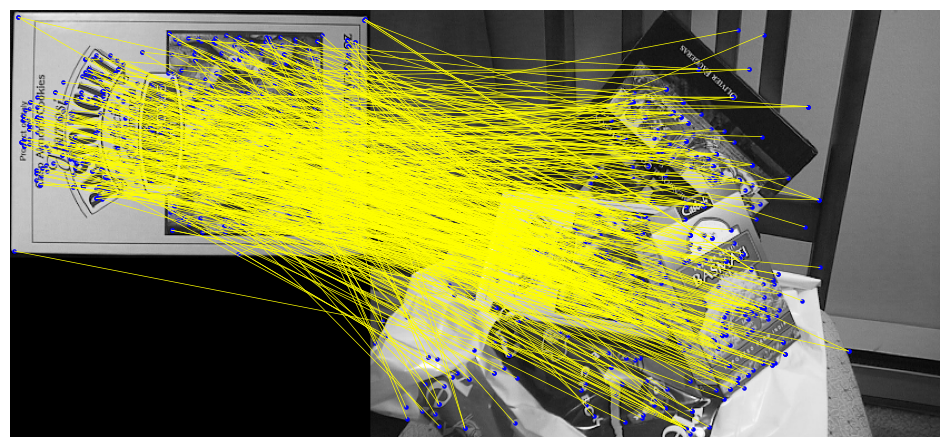

In [25]:
correspondences = find_nearest_keypoints(descriptors1, keypoints1, descriptors2, keypoints2)
display_correspondences(img1, img2, correspondences)

Now we compare our implementation to KNN matching.

(np.float64(-0.5), np.float64(835.5), np.float64(383.5), np.float64(-0.5))

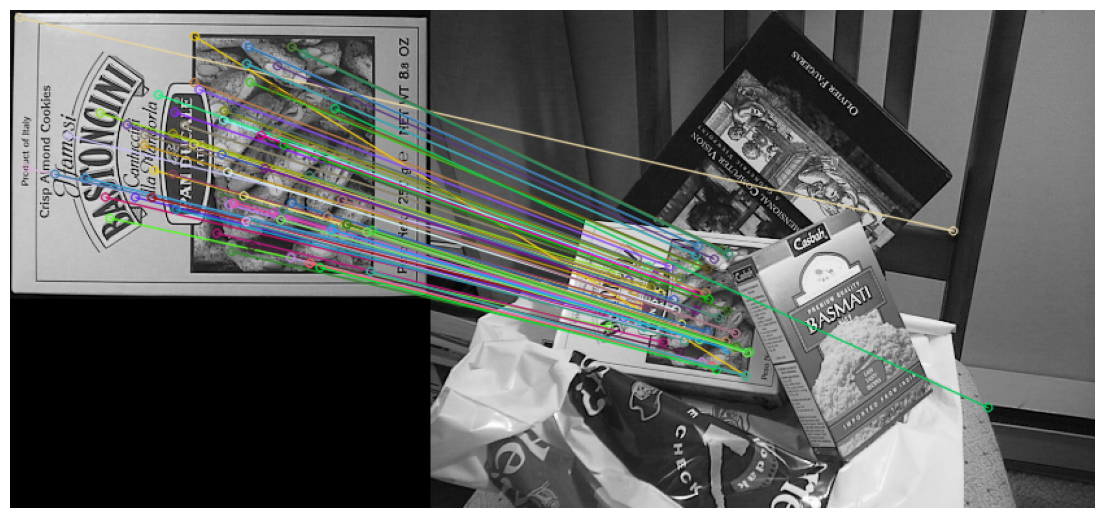

In [26]:
bf = cv.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

good_knn = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_knn.append([m])

matched_img_knn = cv.drawMatchesKnn(
    img1, keypoints1,
    img2, keypoints2,
    good_knn, None,
    flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

plt.figure(figsize=(14, 7))
plt.imshow(cv.cvtColor(matched_img_knn, cv.COLOR_BGR2RGB))
plt.axis('off')

## Question

Which method produced a better result? Explain why.

The BFMatcher+KNN approach yields cleaner, more reliable matches because it checks the two closest neighbors and uses the ratio test to discard ambiguous pairings. In contrast, the naive “single nearest” loop forces every descriptor to match, allowing many false positives.

# 4. Ball-in-Box Simulation and Tracking with FFT Feature Extraction

In this part, you will complete and extend a Python code that simulates a lossless bouncing ball inside a rotated box, extracts frequency-domain features from video frames using FFT, and tracks the ball’s motion in the generated video. You will also demonstrate your code by uploading and processing your own video files. Follow the tasks below:

<center>
  <img src="https://raw.githubusercontent.com/BlackRanger4/Signals-and-Systems---CHW/main/tracked_output.gif" width="200px">
</center>


---

### Part 1: Simulating a Lossless Ball in a Rotated Box

The function `simulate_ball` should simulate a ball bouncing inside a rotated rectangular boundary without energy loss. Some parts of the collision-handling code have been removed, you must:

1. **Complete the rotated-box collision logic** by filling in the missing code that:  
   a. Computes the ball’s signed distance to each wall of the rotated box using the wall’s normal vector.  
   b. Detects when the ball overlaps (penetrates) the wall by comparing the distance to the ball’s radius.  
   c. Reflects the velocity vector about the wall’s normal to produce a perfectly elastic (lossless) bounce.  

2. **Ensure the ball never loses speed** (i.e., no damping).  
3. **Validate** that your simulation keeps the ball inside the box and the window boundaries for the entire duration.

---

### Part 2: Feature-Based Tracking of the Ball in Video

Using the simulated video `output.mp4` and the exported CSV (`frame, x, y`), implement a tracking algorithm that:

1. Reads the video and CSV of ground-truth positions.
2. Extracts an initial template patch around the known ball position in the first frame.
3. For each subsequent frame:
   - Crops a larger search window around the previous ball position.
   - Applies your `extract_fft_features` to both the template and every sliding window in the search region.
   - **Compares feature maps** (e.g., via sum of squared differences or dot product) to select the best-matching patch.
   - Updates the ball’s estimated center based on the best match.
   - Draws a bounding box around the estimated position and writes the output frame.
4. Writes the tracked video to `tracked_output.mp4` and computes tracking error metrics (e.g., average Euclidean distance to ground truth).






In [33]:
import cv2
import numpy as np
import math

def rotate_point(point, center, angle):
    """Rotate a point around a center by given angle (degrees)"""
    angle_rad = math.radians(angle)
    ox, oy = center
    px, py = point

    qx = ox + math.cos(angle_rad) * (px - ox) - math.sin(angle_rad) * (py - oy)
    qy = oy + math.sin(angle_rad) * (px - ox) + math.cos(angle_rad) * (py - oy)
    return (qx, qy)

def simulate_ball(window_size, box, initial_speed, G, fps, start_pos, box_angle=0, ball_radius=10, duration=10):
    window_width, window_height = window_size
    box_x, box_y, box_w, box_h = box
    start_x, start_y = start_pos
    vx, vy = initial_speed
    dt = 1.0 / fps

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter('output_corrected.mp4', fourcc, fps, (window_width, window_height))

    box_center_x = box_x + box_w / 2.0
    box_center_y = box_y + box_h / 2.0
    box_center = (box_center_x, box_center_y)
    half_w = box_w / 2.0
    half_h = box_h / 2.0

    angle_rad = math.radians(box_angle)
    cos_angle = math.cos(angle_rad)
    sin_angle = math.sin(angle_rad)

    original_corners = [
        (box_x,       box_y),
        (box_x + box_w, box_y),
        (box_x + box_w, box_y + box_h),
        (box_x,       box_y + box_h)
    ]
    rotated_corners = [rotate_point(c, box_center, box_angle) for c in original_corners]

    x, y = float(start_x), float(start_y)
    radius = float(ball_radius)
    positions = []

    for _ in range(int(fps * duration)):
        vy += G * dt
        x += vx * dt
        y += vy * dt

        if x - radius < 0:
            x = radius
            vx = -vx
        elif x + radius > window_width:
            x = window_width - radius
            vx = -vx
        if y - radius < 0:
            y = radius
            vy = -vy
        elif y + radius > window_height:
            y = window_height - radius
            vy = -vy

        dx = x - box_center_x
        dy = y - box_center_y
        local_x =  cos_angle * dx + sin_angle * dy
        local_y = -sin_angle * dx + cos_angle * dy

        local_vx =  cos_angle * vx + sin_angle * vy
        local_vy = -sin_angle * vx + cos_angle * vy

        collided = False
        new_local_vx = local_vx
        new_local_vy = local_vy

        if local_x - radius < -half_w:
            local_x = -half_w + radius
            new_local_vx = -local_vx
            collided = True
        elif local_x + radius > half_w:
            local_x = half_w - radius
            new_local_vx = -local_vx
            collided = True

        if local_y - radius < -half_h:
            local_y = -half_h + radius
            new_local_vy = -local_vy
            collided = True
        elif local_y + radius > half_h:
            local_y = half_h - radius
            new_local_vy = -local_vy
            collided = True

        if collided:
            x = box_center_x + (cos_angle * local_x - sin_angle * local_y)
            y = box_center_y + (sin_angle * local_x + cos_angle * local_y)

            vx = cos_angle * new_local_vx - sin_angle * new_local_vy
            vy = sin_angle * new_local_vx + cos_angle * new_local_vy

        positions.append((x, y))

        frame = np.full((window_height, window_width, 3), 255, dtype=np.uint8)
        cv2.polylines(frame, [np.array(rotated_corners, np.int32)], True, (0, 0, 255), 2)
        cv2.circle(frame, (int(x), int(y)), int(radius), (255, 0, 0), -1)
        out.write(frame)

    out.release()
    return positions

In [38]:
window_size = (800, 600)
box = (200, 150, 400, 300)
initial_speed = (200.0, -150.0)
G = 200.0
fps = 60
start_pos = (box[0] + box[2] / 2,
             box[1] + box[3] / 2)
box_angle = 30.0

positions = simulate_ball(window_size, box, initial_speed, G, fps, start_pos, box_angle)

with open('ball_positions.csv', 'w') as f:
    f.write("frame,x,y\n")
    for i, (x, y) in enumerate(positions):
        f.write(f"{i},{x:.2f},{y:.2f}\n")

print(f"Simulation complete! Saved {len(positions)} positions to ball_positions.csv")

Simulation complete! Saved 600 positions to ball_positions.csv


In [40]:
import cv2
import numpy as np
import pandas as pd

video_path = 'output_corrected.mp4'
csv_path = 'ball_positions.csv'
template_size = (40, 40)
search_factor = 3
output_path = 'tracked_output.mp4'

df = pd.read_csv(csv_path)

cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_w, frame_h))

def get_patch(img, center, size):
    w, h = size
    cx, cy = int(center[0]), int(center[1])
    x1 = cx - w // 2
    y1 = cy - h // 2
    x2 = x1 + w
    y2 = y1 + h

    x1_clamped = max(0, x1)
    y1_clamped = max(0, y1)
    x2_clamped = min(img.shape[1], x2)
    y2_clamped = min(img.shape[0], y2)

    patch = np.zeros((h, w), dtype=img.dtype)
    px1 = x1_clamped - x1
    py1 = y1_clamped - y1
    px2 = px1 + (x2_clamped - x1_clamped)
    py2 = py1 + (y2_clamped - y1_clamped)

    patch[py1:py2, px1:px2] = img[y1_clamped:y2_clamped, x1_clamped:x2_clamped]
    return patch, (x1_clamped, y1_clamped)

def extract_fft_features(patch):
    f = np.fft.fft2(patch.astype(np.float32))
    fshift = np.fft.fftshift(f)
    magnitude = np.abs(fshift)
    mag_norm = magnitude / (np.linalg.norm(magnitude) + 1e-8)
    return mag_norm

ret, prev_frame = cap.read()
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

init = df.iloc[0]
center = (init['x'], init['y'])

template, _ = get_patch(prev_gray, center, template_size)
template_fft = extract_fft_features(template)

frame_idx = 1
while True:
    ret, frame = cap.read()
    if not ret or frame_idx >= len(df):
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    tw, th = template_size
    sw = int(tw * search_factor)
    sh = int(th * search_factor)

    search_window, (sw_x1, sw_y1) = get_patch(gray, center, (sw, sh))
    sw_h, sw_w = search_window.shape

    best_score = -np.inf
    best_offset = (0, 0)

    for y in range(0, sw_h - th + 1):
        for x in range(0, sw_w - tw + 1):
            candidate = search_window[y:y+th, x:x+tw]
            cand_fft = extract_fft_features(candidate)
            score = np.sum(template_fft * cand_fft)
            if score > best_score:
                best_score = score
                best_offset = (x, y)

    dx, dy = best_offset
    new_cx = sw_x1 + dx + tw // 2
    new_cy = sw_y1 + dy + th // 2
    center = (new_cx, new_cy)

    x1 = int(center[0] - tw // 2)
    y1 = int(center[1] - th // 2)
    x2 = x1 + tw
    y2 = y1 + th
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    out.write(frame)

    template, _ = get_patch(gray, center, template_size)
    template_fft = extract_fft_features(template)

    frame_idx += 1

cap.release()
out.release()
print('Tracking complete. Output saved to', output_path)

Tracking complete. Output saved to tracked_output.mp4
